[View in Colaboratory](https://colab.research.google.com/github/act65/Notes/blob/master/quantum_algols_via_linalg.ipynb)

In [0]:
from functools import reduce
import math

import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import matplotlib.pyplot as plt

tl;dr. Make a computer in linear algebra. The extension to quantum computers is quite easy.

Based on [this](https://mitpress.mit.edu/books/quantum-algorithms-linear-algebra) book (there is a pdf version lurking on the net)

# Representation

_This is the unusual part and everything else just kind follows nicely._



How should we encode the states of our computation into linear algebra? Potential options are;
- ?
- ?
- ?
- The indexes are the states. [tick]

x[i] indexes a single possible state of the n binary variables. 
for example, if we had n = 2. then iteration over i gives 
00, 01, 10, 11. thus we have 2**n indexes (which gets out of control fast!)

For 49 bit computer we would need 2**49 = 5.6e14 indexes...

In [0]:
# number of bits
n = 2

def e(i, n):  
  # generate the ith pure state for a n bit space
  arr = np.zeros((2**n, 1))
  arr[i, 0] = 1
  return arr

def get_start(n):
  # the basis vectors of our space
  pure_states = (e(i, n) for i in range(2**n)) 
  return next(pure_states)

start = get_start(n)

In [0]:
"""
Great, but what do these bases represent? Binary strings!

It can be easier to work with binary strings than vector spaces so let's 
make some tools for getting between the two representations.
"""

def measure(x):
  # returns probabilities
  return np.power(lin.norm(x, axis=1),2)

def encode(binary_string):
  assert isinstance(binary_string, str)
  idx = np.sum([int(s)*(2**i) for i, s in enumerate(reversed(binary_string))])
  return np.eye(1, 2**len(binary_string), idx).T

def generate_binary(n):
  # 2^(n-1)  2^n - 1 inclusive
  bin_arr = range(0, int(math.pow(2,n)))
  bin_arr = [bin(i)[2:] for i in bin_arr]

  # Prepending 0's to binary strings
  max_len = len(max(bin_arr, key=len))
  bin_arr = [i.zfill(max_len) for i in bin_arr]

  return bin_arr


def decode(x):
  assert isinstance(x, np.ndarray)
  n = np.log(len(x))/np.log(2)
  s = generate_binary(n)
  
  idx = np.argmax(measure(x))
#   print(s, idx, x, len(x), x.size)
  return s[idx]

def test():
  s = '0110'
  assert s == decode(encode(s))
  
  s = '10110'
  assert s == decode(encode(s))
  
  x = e(2, 8)
  assert (x == encode(decode(x))).all()
  
  x =  e(3, 16)
  assert (x == encode(decode(x))).all()
  
test()

In [51]:
n = 3
print('For a {} bit space'.format(n))
for i in range(2**n):
  r = e(i, n)  
  print('e_{} gets decoded to the binary string: {}'.format(i, decode(r)))

For a 3 bit space
e_0 gets decoded to the binary string: 000
e_1 gets decoded to the binary string: 001
e_2 gets decoded to the binary string: 010
e_3 gets decoded to the binary string: 011
e_4 gets decoded to the binary string: 100
e_5 gets decoded to the binary string: 101
e_6 gets decoded to the binary string: 110
e_7 gets decoded to the binary string: 111


# Classical logic

Are operators with only a single 1 in each row/column, aka permutation matrices.
So with the help of extra dimensions, move operations, ... linear algebra is now turing complete?!

## Operators


Too expensive to construct in XX space. Want to be able to construct them from 
small pieces. A bias.

All operators must be unitary. (cannot f with the total probability)

### Unary operators

?


In [0]:
# unary operators
I = np.eye(2)  # identity
X = np.ones((2,2)) - np.eye(2)  # negation

### Binary operators

Because binary operators work on two bits, we need to work in $2^2$ states. Aka we need at least a 4x4 matric to represent these binary fns.

#### XOR

In this representation, XOR is the simplest to implement. This is because of its symmetry (define what I mean here...)



In [0]:
CNOT = np.eye(4)  # aka XOR. which writes result into second bit
CNOT[[0, 1, 2, 3]] = CNOT[[0,1,3,2]]
# interesting how this is like an in place operation?!? doesnt need any memory!?
# what about AND and OR. they are less trivial.

#### AND

The AND op is less trivial. __Exercise__ Try it yourself, why doesnt AND work in 4x4?


Lets say we wanted to write the result of the AND op into the 2nd bit.

$$
\begin{bmatrix}
- & 00 & 01 & 10 & 11  \\
00 & 1 & 0 & 0 & 0 \\
01 & 0 & 1 & 0 & 0 \\
10 & 0 & 0 & ? & 0 \\
11 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$


For three inputs (`00, 01, 10`) we need to write them to `0`, but there do not exist three states with `0` in the same place. So, !?!? MY solution to this is to simply use another bit. But, why is this necessary? Somehow the AND operation requires more information than XOR. 

Wait a minute, that makes a lot of sense because .... ?!? TODO

So, lets write result of AND (applied to last two bits) into the first bit.
$$
\begin{bmatrix}
- & 000 & 001 & 010 & 011 & 100 & 101 & 110 & 111 \\
000 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
001 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
010 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
011 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
100 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
101 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 
110 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
111 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

Ok I think that works? We just need to be careful when initialising and managing our states: Make sure the the first bit is set to zero if we want to AND. 
_If we want to reuse this op then we will need to reset it somehow._

In [0]:
def bin2int(x):
  return np.sum([v*2**i for i, v in enumerate(reversed(x))])

def truth_table_binary_op(op, mode=0):
  print('Mode: {}'.format(mode))
  for i in range(2):  # how to extent to more inputs?
    for j in range(2):
      idx = bin2int([mode, i, j])
      x = e(idx, 3)
      y = np.dot(op, x)
      s = decode(y)
      print('{} {} -> {}'.format(i, j, s[0]))

In [96]:
AND = np.eye(8)
AND[[0,1,2,3,4,5,6,7]] = AND[[0,1,2,4,3,5,6,7]]

truth_table_binary_op(AND)
truth_table_binary_op(AND, 1)

Mode: 0
0 0 -> 0
0 1 -> 0
1 0 -> 0
1 1 -> 1
Mode: 1
0 0 -> 0
0 1 -> 1
1 0 -> 1
1 1 -> 1


### OR

Huh, cool. The second half (when the first bit is set to 1) yields OR. What is up with that?
_Hmm, I thought I was going to get NAND, rather than OR..._

Couldnt I also write OR as follows??!?


$$
\begin{bmatrix}
- & 000 & 001 & 010 & 011 & 100 & 101 & 110 & 111 \\
000 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
001 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
010 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
011 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
100 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
101 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
110 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
111 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

So, according to this symmetry, AND and OR are duals of each other!?!?!?
What is the symmetry!?

In [98]:
OR = np.eye(8)
OR[[0,1,2,3,4,5,6,7]] = OR[[0,4,5,6,1,2,3,7]]

truth_table_binary_op(OR)
truth_table_binary_op(OR, 1)

Mode: 0
0 0 -> 0
0 1 -> 1
1 0 -> 1
1 1 -> 1
Mode: 1
0 0 -> 0
0 1 -> 0
1 0 -> 0
1 1 -> 1


In [0]:
# want to verify their behaviour.
# AND(Not a, Not b) == NOR(a, b)
# OR(Not a, Not b) == NAND(a, b)

r1 = decode(np.dot(CAND, encode('011')))
r2 = decode(np.dot(COR, encode('111')))  # set first bit to 1 to change to OR to NOR
print(r1, r2)

## A complier for the ops

Ok, we have some basic ops. How can we compile them into a runable program?

In [0]:
# ok, want a nicer synatx/compiler.
# just specify where an op is applied and the Is get filled in.
# can specify which variables an op is applied to
# check program!? do the number of dims match?
n_bits = 4
init = '0011'

def flip_bits(s):
  return [X if s == '1' else I for s in init]

def compiler(prog_spec):
  
  # want program construction to be lazier!? 
  # if possible do compute in lower dim.
  # dont construct matrices until necessary!?
  # ...?
  
  # if we have finished with some bits, or not used them yet, 
  # dont bother computing with them!!?

   return (reduce(np.kron, i) for i in prog_spec)

prog_spec = [flip_bits(init),  # set state to init
             [I, CAND],     # and last two bits and store in 3rd bit
             [I, I, X, X],  # still not sure this one is expected behaviour...
             [CAND, I],     # AND the middle two bits and store in 4th bit
            ]     

  
program = compiler(prog_spec)

In [116]:
def run(prog):
  """
  Can accept two valid program sprcifications.
  
  (want to use typing on the input/function switching!?!?)
  """
  first_op = next(prog)
  state = e(0, int(np.log2(first_op.shape[0])))  # the first state = 00...000
  state = np.dot(first_op, state)
  for p in prog:
    print(decode(state))
    state = np.dot(p, state)
  return state

output = run(compiler(prog_spec))
print(decode(output))

0011
0100
0111
1001


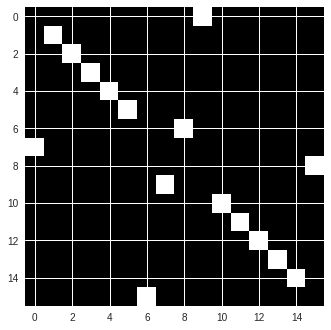

In [108]:
# alternatively we could construct the whole program first, into a single tensor
# and the apply it in one shot. However, this is less intuitive as we
# do not get access to the intermediate states.
# but it does mean we can visualise the entire program.
program = reduce(np.dot, compiler(prog_spec))
plt.imshow(prog, cmap='Greys_r', interpolation='nearest')

In [9]:
"""
Relationship to graphs!

Any computation can be written as a computation graph.
The matrix represents the ...
"""

'\nRelationship to graphs!\n\nAny computation can be written as a computation graph.\nThe matrix represents the ...\n'

In [0]:
"""
There is something funny going on!
BC the matrices are really 2x..x2 tensors their structures have some unusual symmetries?!
Want to investigate further.
"""

## Syntactic sugar (higher level interface)

Higher level interface, intuitive representation, ...

In [0]:
class Operator(np.ndarray):  
  """
  https://docs.scipy.org/doc/numpy-1.13.0/user/basics.subclassing.html


  Make a child of np.ndarray? so we can still use them as tensors!? np.dot()
  Would be nice if after composition operators still print pretty.

  """
  def __new__(self, name, op, *args, **kwargs):

  def __init__(self, name, op, *args, **kwargs):
    self.name = name
    self.op = op
    
  def __repr__(self):
    return self.name

I = Operator('I', np.eye(2))
X = Operator('X', np.fliplr(np.eye(2)))

00


In [0]:
class State(np.ndarray):  # also a child of ndarray!?
  def __init__(self, n_bits):
    self.value = np.eye(1, 2**n_bits, 0).T

  def __repr__(self):
    n = np.log(len(x))/np.log(2)
    s = generate_binary(n)

    idx = np.argmax(measure(x))
    return s[idx]
  
print(State(3))

Ok. What about flip-flops?

## 3-bit Adder

Need 3 bits x 4 for the two inputs, the sum and the carry. (maybe could overwrite, but for now dont bother)






## Set

These matrices will have to be tailor made? Seems like a pain?!
If we always know we are going to start in $e_0$, then we can easily construct an operator to set the state, $op[0, 0101] = 1$ and just randomly fill in the rest. This is a global operator? Must be constructed at $2^N$? Or are we allowed to just permute the state/operator!?

Going to be some kind of block wise operation?

In [0]:
def flip_bits_by_block(n_bits, binary_string, location):
  """
  Want a way to set the initial state for later computation.
  Effectively, this op should allow us to add in constants/argument/inputs.
  
  Args:
    n_bits (int): the number of bits of the space
    binary_string (str): the pattern of bits to flip (flip if 1, else pass)
    location (int): the position to start applying the binary_string
    
   Returns:
    list of operators
  """
  # can be used to set the state (assuming the operator recieves all zeros).
  locs = [i+location for i, s in enumerate(binary_string) if bool(int(s))]
  return [X if i in locs else I for i in range(n_bits)]

start = e(0, 8)

a = '0011'
print(decode(start))
m = flip_bits_by_block(8, a, 0)
p = reduce(np.kron, m)
y = np.dot(p, start)
print(decode(y))


b = '0001'
m = flip_bits_by_block(8, b, 4)
p = reduce(np.kron, m)

z = np.dot(p, y)
print(decode(z))
# print(decode(start))

00000000
00110000
00110001


In [20]:
n_bits = 12
start = np.eye(1, 2**n_bits, 0).T  # the state is always started at '00...00'


def adder(x, y):
  # need methods to;
  # - scatter and gather!?!
  # - partial set
  load_spec = [flip_bits_by_block(n_bits, x, 0),  # load the x and y values
                flip_bits_by_block(n_bits, y, 3),
               ]
  # compile
  load_prog = reduce(np.dot, [reduce(np.kron, ps) for ps in load_spec])

  
  gather_prog = permute(n_bits, [0,4,8,1,5,9,2,6,10,3,7,11])
  # how to apply SUM to bits 1-4, 2-5, ... and CARRY to them as well...
  # adder_spec = [   # sum
  #                  # carry
  # ]  
  
  
  return decode(np.dot(np.dot(load_prog, start), gather_prog))


a = '100'  # 4
b = '010'  # 2


print(adder(a, b))

ValueError: ignored

In [18]:
# scatter aka gather, if we are using the same space!?
# doesnt make sense wrt tensor operations? no way to reduce the size of the space.
def permute(n_bits, idx):
  """
  
  Returns:
    operator
  """
  m = np.eye(2**n_bits)
  idx0 = idx*2
  idx1 = idx0 + 1
  m[range(2**n_bits)] = m[idx]
  return m

x = [0,0,0,1,0,0,0,0]
p = permute(4, [0,1,3,2])
print(p)
np.dot(p, x)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


array([0., 0., 1., 0.])

# Quantum algorithms

???

Other things to think about. 
- How does quantum error correction come into this?
- ?!

In [0]:
"""
QUANTUM OPERATORS
"""
# hadamard
H = np.ones((2,2))/np.sqrt(2)
H[1,1] *= -1

# toffoli
TOF = 1

# ?


prog = np.dot(np.kron(H, I), CNOT)
y = np.dot(prog, x)

In [0]:
"""
Some other operatiors.
"""

def fourier_matrix(n):
  # https://en.wikipedia.org/wiki/DFT_matrix
  r = np.arange(n)
  a, b = np.meshgrid(r,r)
  return np.exp(-2*np.pi*1j*a*b/n)/np.sqrt(n)

0.5

How can this be done efficiently?
Can we do some computations in the lower dim space, before we compose the different dimensions?